In [1]:
# import all the required libraries in this place


import json
import csv
import threading
import math
import pandas as pd
import numpy as np
import multiprocessing
import random as rn

import seaborn as sns
import matplotlib.pyplot as plt



# from data import data_visualization, data_loading, data_preprocessing
# from models import annModels

# from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.model_selection import  learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from scikeras.wrappers import KerasClassifier

# import xgboost as xgb

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout, Activation
from keras.optimizers import SGD
from keras.models import load_model
from keras import regularizers
from keras import backend as K
from keras.layers import BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras.layers import concatenate
from sklearn.model_selection import StratifiedKFold

import joblib

2024-08-21 23:39:17.191962: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-21 23:39:17.205452: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 23:39:17.219905: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 23:39:17.224367: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-21 23:39:17.234503: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Load and preprocess data
def load_data():
    df = pd.read_csv('/home/devnath/MOTIF_18_Aug/dataset/motif_standardized_dataset.csv')
    X = df.drop(['family'], axis=True).values
    y = df['family'].values
    
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_train,
        y_train,
        test_size=0.1,
        random_state=42,
        stratify=y_train
    )

    return X_train, X_test, y_train, y_test, X_val, y_val

X_train, X_test, y_train, y_test, X_val, y_val = load_data()

In [3]:
X_train, X_test, y_train, y_test, X_val, y_val = load_data()

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((1432, 41), (399, 41), (1432,), (399,), (160, 41), (160,))

2024-08-23 08:56:24.461520: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-23 08:56:24.475471: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-23 08:56:24.496043: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-23 08:56:24.504045: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-23 08:56:24.519680: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/60


I0000 00:00:1724383588.218175  299213 service.cc:146] XLA service 0x794e0000a190 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724383588.218245  299213 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2024-08-23 08:56:28.247865: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-23 08:56:28.392460: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 1/40 ━━━━━━━━━━━━━━━━━━━━ 1:48 3s/step - accuracy: 0.1562 - loss: 4.2300

I0000 00:00:1724383589.942061  299213 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1910 - loss: 4.0480
Epoch 1: val_loss improved from inf to 3.60231, saving model to /home/devnath/MOTIF_18_Aug/model_save/ann_multiclass_classifier_reduced.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.1915 - loss: 4.0448 - val_accuracy: 0.2696 - val_loss: 3.6023
Epoch 2/60
38/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2497 - loss: 3.5761 
Epoch 2: val_loss improved from 3.60231 to 3.26870, saving model to /home/devnath/MOTIF_18_Aug/model_save/ann_multiclass_classifier_reduced.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2494 - loss: 3.5706 - val_accuracy: 0.3135 - val_loss: 3.2687
Epoch 3/60
38/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2492 - loss: 3.2639 
Epoch 3: val_loss improved from 3.26870 to 3.01401, saving model to /home/devnath/MOTIF_18_Aug/model_save/ann_multiclass_classifier_reduced.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2507 - loss: 3.2608 - val_accuracy: 0

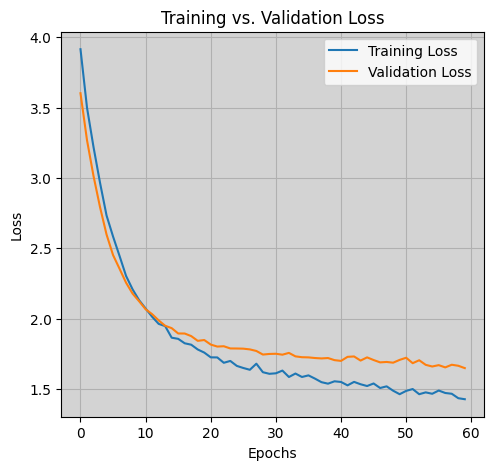

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/home/devnath/MOTIF_18_Aug/dataset/motif_standardized_dataset.csv')

# Assume 'family' is the column with the target variable
X = df.drop(columns=['family'])
y = df['family']

# Convert labels to categorical (one-hot encoding)
num_classes = len(y.unique())
y = to_categorical(y, num_classes=num_classes)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential()
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    filepath='/home/devnath/MOTIF_18_Aug/model_save/ann_multiclass_classifier_reduced.keras', 
    monitor='val_loss', 
    save_best_only=True,
    save_weights_only=False, 
    mode='min', 
    verbose=1
)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=60,  # Increase epochs for better training
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')

# Plot training & validation loss
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')

# Set grid and background color
plt.grid(True)
plt.gca().set_facecolor('lightgrey')

plt.show()


In [2]:
# Save the trained model
model.save('/home/devnath/MOTIF_18_Aug/model_save/ann_base_classfier.h5')

In [4]:
from tensorflow.keras.models import load_model

# Load the saved model
ann_model = load_model('/home/devnath/MOTIF_18_Aug/model_save/ann_base_classfier.h5')


In [5]:
ann_base_2 = ann_model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [6]:
 ann_base_2.shape

(399, 10)

2024-08-24 21:22:06.462194: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-24 21:22:06.478397: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-24 21:22:06.495599: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-24 21:22:06.500036: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-24 21:22:06.513763: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/50


I0000 00:00:1724514729.954786  612313 service.cc:146] XLA service 0x78ba5001d5b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724514729.954832  612313 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2024-08-24 21:22:09.985784: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-24 21:22:10.135664: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 1/20 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.0312 - loss: 5.9030

I0000 00:00:1724514731.870541  612313 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.1264 - loss: 5.5608
Epoch 1: val_loss improved from inf to 4.87980, saving model to /home/devnath/MOTIF_18_Aug/model_save/ann_multiclass_classifier_reduced.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - accuracy: 0.1287 - loss: 5.5502 - val_accuracy: 0.2947 - val_loss: 4.8798
Epoch 2/50
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1719 - loss: 5.0442
Epoch 2: val_loss improved from 4.87980 to 4.41461, saving model to /home/devnath/MOTIF_18_Aug/model_save/ann_multiclass_classifier_reduced.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2331 - loss: 4.8623 - val_accuracy: 0.3260 - val_loss: 4.4146
Epoch 3/50
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2344 - loss: 4.5046
Epoch 3: val_loss improved from 4.41461 to 4.01216, saving model to /home/devnath/MOTIF_18_Aug/model_save/ann_multiclass_classifier_reduced.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2606 - loss: 4.3884 - val_accuracy: 0

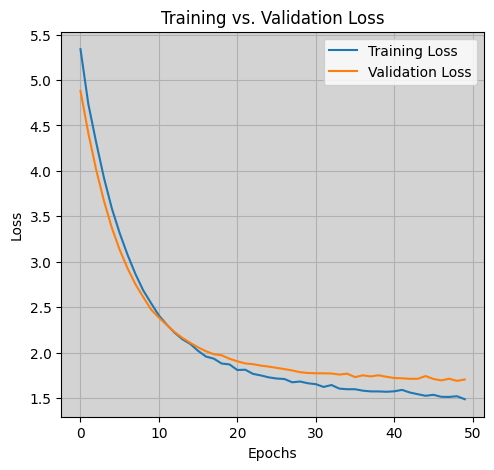

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/home/devnath/MOTIF_18_Aug/dataset/motif_standardized_dataset.csv')

# Assume 'family' is the column with the target variable
X = df.drop(columns=['family'])
y = df['family']

# Convert labels to categorical (one-hot encoding)
num_classes = len(y.unique())
y = to_categorical(y, num_classes=num_classes)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential()
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    filepath='/home/devnath/MOTIF_18_Aug/model_save/ann_multiclass_classifier_reduced.keras', 
    monitor='val_loss', 
    save_best_only=True,
    save_weights_only=False, 
    mode='min', 
    verbose=1
)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,  # Increased epochs for more training
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')

# Plot training & validation loss
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')

# Set grid and background color
plt.grid(True)
plt.gca().set_facecolor('lightgrey')

plt.show()


In [2]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        10,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,664 (615.88 KB)

 Trainable params: 52,554 (205.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 105,110 (410.59 KB)

In [3]:
# Save the trained model
model.save('/home/devnath/MOTIF_18_Aug/model_save/ann_base_classfier.h5')

In [4]:
from tensorflow.keras.models import load_model

# Load the saved model
ann_model = load_model('/home/devnath/MOTIF_18_Aug/model_save/ann_base_classfier.h5')


In [5]:
ann_base_2 = ann_model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [6]:
ann_base_2.shape

(399, 10)

2024-08-24 21:46:03.036161: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-24 21:46:03.050360: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-24 21:46:03.070431: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-24 21:46:03.075187: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-24 21:46:03.087056: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/50


I0000 00:00:1724516166.614842  626936 service.cc:146] XLA service 0x7f23d801f620 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724516166.614893  626936 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2024-08-24 21:46:06.647313: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-24 21:46:06.799072: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 1/20 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.0781 - loss: 5.6687

I0000 00:00:1724516168.549959  626936 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.1409 - loss: 5.4755
Epoch 1: val_loss improved from inf to 4.86003, saving model to /home/devnath/MOTIF_18_Aug/model_save/ann_multiclass_classifier_reduced.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 241ms/step - accuracy: 0.1434 - loss: 5.4663 - val_accuracy: 0.2947 - val_loss: 4.8600
Epoch 2/50
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2500 - loss: 4.9831
Epoch 2: val_loss improved from 4.86003 to 4.33221, saving model to /home/devnath/MOTIF_18_Aug/model_save/ann_multiclass_classifier_reduced.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2629 - loss: 4.7913 - val_accuracy: 0.3574 - val_loss: 4.3322
Epoch 3/50
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2500 - loss: 4.3940
Epoch 3: val_loss improved from 4.33221 to 3.90676, saving model to /home/devnath/MOTIF_18_Aug/model_save/ann_multiclass_classifier_reduced.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2678 - loss: 4.3107 - val_accuracy: 0

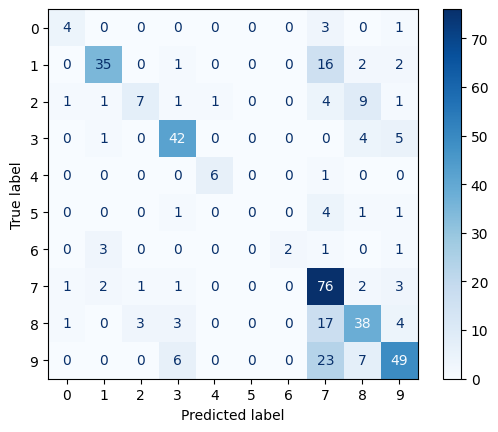

Accuracy: 0.6491
Precision: 0.6689
Recall: 0.6491
F1-Score: 0.6371


/home/devnath/anaconda3/envs/ember_tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


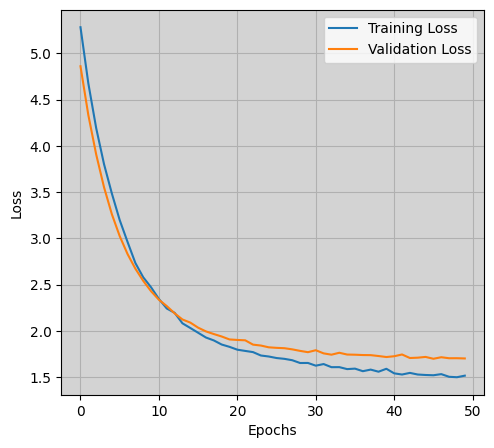

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv('/home/devnath/MOTIF_18_Aug/dataset/motif_standardized_dataset.csv')

# Assume 'family' is the column with the target variable
X = df.drop(columns=['family'])
y = df['family']

# Convert labels to categorical (one-hot encoding)
num_classes = len(y.unique())
y = to_categorical(y, num_classes=num_classes)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential()
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    filepath='/home/devnath/MOTIF_18_Aug/model_save/ann_multiclass_classifier_reduced.keras', 
    monitor='val_loss', 
    save_best_only=True,
    save_weights_only=False, 
    mode='min', 
    verbose=1
)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(num_classes))
disp.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
plt.show()

# Accuracy, Precision, Recall, and F1-Score
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Plot training & validation loss
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.title('Training vs. Validation Loss')

# Set grid and background color
plt.grid(True)
plt.gca().set_facecolor('lightgrey')

plt.show()


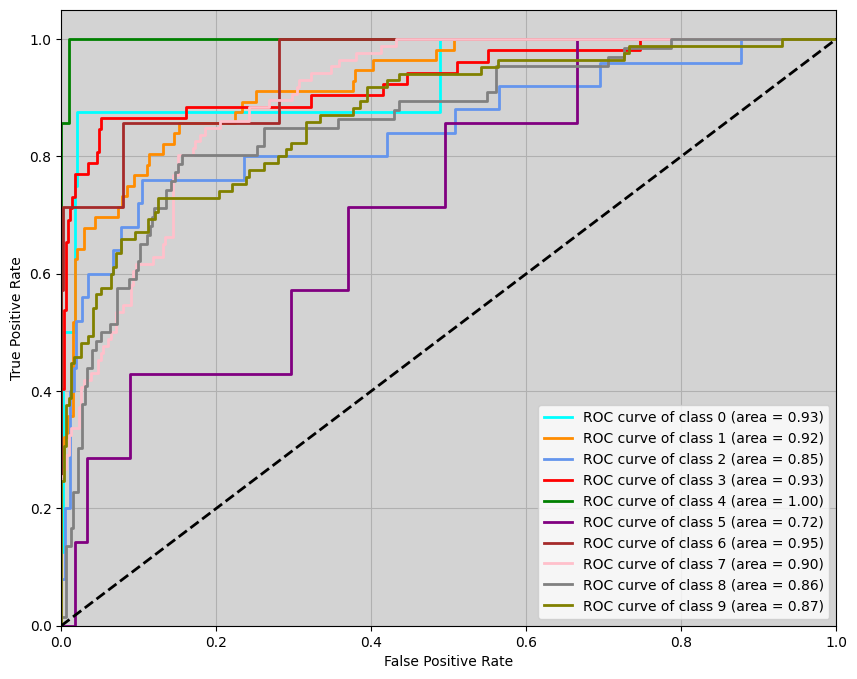

In [2]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output (one-hot encoding for ROC curve)
y_test_binarized = label_binarize(y_true, classes=range(num_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive'])

for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curves for Multi-Class')
plt.legend(loc="lower right")
plt.grid(True)
plt.gca().set_facecolor('lightgrey')
plt.show()
